In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install ultralytics
!pip install easyocr
!pip install torch torchvision
!pip install ultralytics
!pip install bitsandbytes
!pip install peft
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 14.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 23.1 MB/s eta 0:00:00:00:0100:01


In [2]:
#train the model
from ultralytics import YOLO

# Load the YOLOv8 model (pre-trained)
model = YOLO("yolov8n.pt")  # You can also try 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

# Train the model on your dataset
model.train(
    data="/kaggle/input/multiclass/data.yaml",  # Path to your dataset config file
    epochs=50,  # Increase for better accuracy
    batch=16,  # Adjust based on GPU
    imgsz=640,  # Resize images for training
    device="cuda"  # Use "cuda" if you have a GPU, otherwise use "cpu"
)
model.val()
results = model.predict(source="/kaggle/input/testtt/testtttt.png", save=True, conf=0.5)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 80.9MB/s]


Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/multiclass/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 17.2MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/multiclass/train/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:01<00:00, 214.74it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/multiclass/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/multiclass/valid/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 156.87it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/multiclass/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.28G      2.081      4.224      1.497       1739        640: 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all          9        675      0.104      0.136      0.111      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.87G      1.612      3.211       1.14       1736        640: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all          9        675      0.147      0.347      0.243       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.86G      1.565      2.452      1.059       1203        640: 100%|██████████| 19/19 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all          9        675      0.141      0.465      0.232      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.9G      1.501       2.05      1.039       1298        640: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all          9        675      0.165      0.603      0.254      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.44G      1.464      1.895       1.02       2516        640: 100%|██████████| 19/19 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all          9        675      0.186      0.684      0.288      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.34G      1.409      1.652      1.013       1607        640: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all          9        675      0.327      0.603      0.389      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.77G      1.362      1.418      1.025       1353        640: 100%|██████████| 19/19 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          9        675       0.66      0.455       0.47      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.56G      1.379      1.338      1.011       1886        640: 100%|██████████| 19/19 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all          9        675      0.702      0.449      0.475      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.43G      1.347       1.18      1.018       1041        640: 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all          9        675      0.631      0.457      0.475      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.98G      1.288      1.079      1.001       1172        640: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all          9        675      0.708      0.502      0.514      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.46G      1.297      1.029     0.9999       2099        640: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all          9        675      0.721      0.534      0.538      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.37G      1.271     0.9691      0.989       1233        640: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all          9        675      0.749      0.463      0.528      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.83G       1.27     0.9006      1.002       1491        640: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all          9        675      0.711      0.486      0.518      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       7.1G      1.233       0.87     0.9819       1278        640: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all          9        675      0.753      0.491      0.528      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       5.9G      1.232     0.8459     0.9813       1260        640: 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all          9        675      0.722      0.539      0.515      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.14G       1.22     0.8146     0.9753       1220        640: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all          9        675      0.717      0.456      0.501      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.12G      1.189     0.8116     0.9788       1751        640: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all          9        675      0.762      0.493      0.509      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.28G       1.18     0.7982     0.9702       1376        640: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all          9        675       0.75      0.494      0.503      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       6.3G      1.185      0.784     0.9679       1530        640: 100%|██████████| 19/19 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all          9        675      0.786      0.503      0.526      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.51G      1.179     0.7589      0.966       1077        640: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all          9        675       0.69      0.498      0.526      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       5.8G      1.167     0.7372      0.962       1694        640: 100%|██████████| 19/19 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all          9        675      0.812      0.458       0.54      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.99G      1.154     0.7249     0.9605       1429        640: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all          9        675      0.532      0.541      0.547      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.62G      1.137     0.7079      0.955        894        640: 100%|██████████| 19/19 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all          9        675      0.725      0.543      0.566      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.93G      1.141     0.7211     0.9576       1520        640: 100%|██████████| 19/19 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all          9        675      0.717      0.532      0.547        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.03G      1.114     0.6929     0.9449       1198        640: 100%|██████████| 19/19 [00:04<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          9        675      0.654      0.563      0.588      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.53G      1.104     0.6761     0.9482       1201        640: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all          9        675      0.734      0.509      0.527      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.83G        1.1     0.6832     0.9512       1531        640: 100%|██████████| 19/19 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all          9        675       0.75      0.525      0.547       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.73G       1.09     0.6756     0.9429       1546        640: 100%|██████████| 19/19 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]

                   all          9        675      0.769      0.534      0.565      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.69G      1.089     0.6383     0.9411       1476        640: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all          9        675      0.486      0.575      0.564      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.64G      1.099     0.6489     0.9411       1378        640: 100%|██████████| 19/19 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all          9        675       0.61      0.543      0.554      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.54G      1.074     0.6347      0.939       1584        640: 100%|██████████| 19/19 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all          9        675      0.489      0.564      0.519       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.18G      1.068     0.6456     0.9333       1478        640: 100%|██████████| 19/19 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all          9        675      0.465       0.56      0.521      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.45G      1.065     0.6263     0.9372       1522        640: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all          9        675      0.437      0.543      0.535      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.62G      1.047     0.6177      0.929       1309        640: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all          9        675      0.602      0.582      0.603      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.92G      1.053     0.6144      0.938       1003        640: 100%|██████████| 19/19 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all          9        675      0.537       0.58      0.564      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.64G      1.045      0.611     0.9383       1423        640: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          9        675      0.693      0.574      0.597      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.78G      1.043     0.6059     0.9299       1312        640: 100%|██████████| 19/19 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all          9        675      0.598      0.576      0.597      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.51G      1.054     0.6083     0.9332       1349        640: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all          9        675      0.595      0.592      0.581       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.74G      1.047      0.606      0.927       1007        640: 100%|██████████| 19/19 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all          9        675      0.561      0.618      0.577      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.36G      1.034     0.6062     0.9252       1654        640: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all          9        675      0.536      0.639       0.57      0.325


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.24G      1.013     0.6319     0.9314       1245        640: 100%|██████████| 19/19 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all          9        675      0.527      0.627      0.563      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.71G     0.9909     0.5859     0.9223        826        640: 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          9        675      0.522      0.543      0.551      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.44G     0.9923     0.5732     0.9199        965        640: 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]

                   all          9        675      0.515      0.585       0.55      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.43G     0.9762     0.5569     0.9215        912        640: 100%|██████████| 19/19 [00:03<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all          9        675      0.544      0.565      0.544      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.52G     0.9686     0.5499     0.9199        948        640: 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all          9        675      0.525      0.588      0.543      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.84G     0.9707     0.5522     0.9182        774        640: 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all          9        675      0.535       0.61       0.55      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.51G     0.9615     0.5494     0.9139        991        640: 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all          9        675      0.535      0.612      0.554      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.36G     0.9526      0.541     0.9124        923        640: 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all          9        675      0.541      0.617       0.56      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.49G     0.9543     0.5387     0.9138        732        640: 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          9        675      0.562      0.598      0.569      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.64G      0.954      0.535     0.9112        759        640: 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all          9        675      0.588      0.587      0.568       0.32



50 epochs completed in 0.070 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all          9        675      0.602      0.583      0.604      0.348
                  Ramy          9        516      0.851      0.957      0.967      0.551
                ifruit          4         10      0.295        0.1      0.165     0.0483
               nonRamy          7        112      0.471      0.384       0.38       0.17
                rouiba          4         37      0.789      0.892      0.903      0.621


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/multiclass/valid/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 481.93it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/multiclass/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


                   all          9        675      0.601      0.581      0.606      0.351
                  Ramy          9        516      0.851      0.957      0.968      0.551
                ifruit          4         10      0.294        0.1      0.164     0.0594
               nonRamy          7        112      0.467      0.375      0.387       0.17
                rouiba          4         37      0.791      0.892      0.904      0.625


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 11.6ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train2

image 1/1 /kaggle/input/testtt/testtttt.png: 480x640 37 Ramys, 7 tchinas, 36.7ms
Speed: 5.1ms preprocess, 36.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/train3



image 1/1 /kaggle/input/testfinal/WhatsApp Image 2025-02-09  16.17.28_11134739.jpg: 480x640 11 Ramys, 22 nonRamys, 31 rouibas, 8.3ms
Speed: 3.5ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/train24


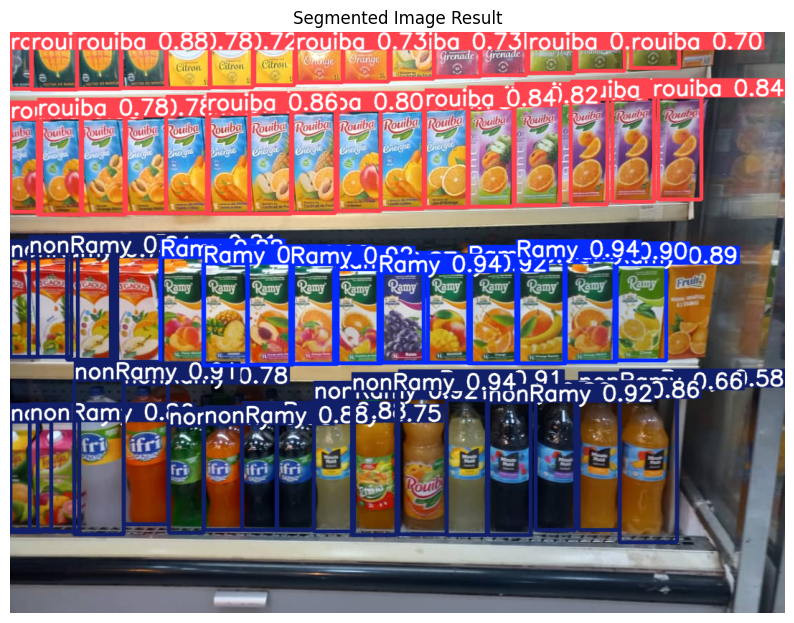

Class count for image WhatsApp Image 2025-02-09  16.17.28_11134739.jpg:
  Ramy: 11
  nonRamy: 22
  rouiba: 31

--------------------------------------------------


image 1/1 /kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.40.39_65a47ad5.jpg: 640x288 60 Ramys, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 288)
Results saved to runs/detect/train25


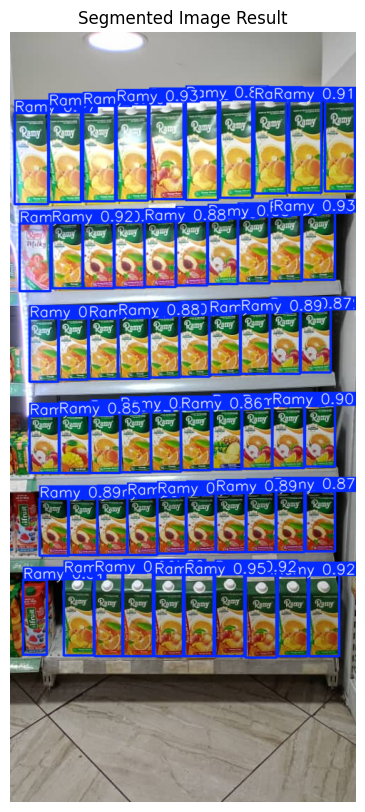

Class count for image WhatsApp Image 2025-02-13 à 22.40.39_65a47ad5.jpg:
  Ramy: 60

--------------------------------------------------


image 1/1 /kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.40.31_216e6ae0.jpg: 640x384 49 Ramys, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/train26


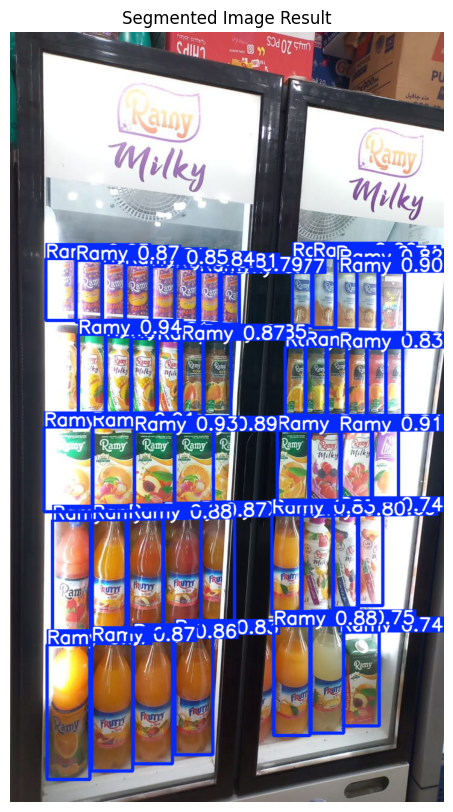

Class count for image WhatsApp Image 2025-02-13 à 22.40.31_216e6ae0.jpg:
  Ramy: 49

--------------------------------------------------


image 1/1 /kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.40.31_4e528d5e.jpg: 288x640 5 Ramys, 1 nonRamy, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/train27


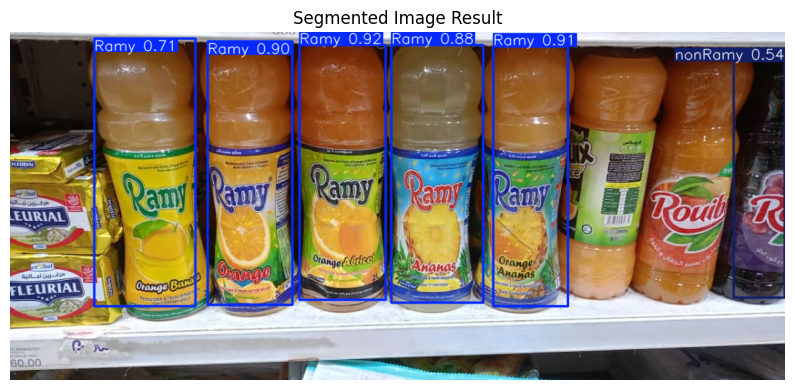

Class count for image WhatsApp Image 2025-02-13 à 22.40.31_4e528d5e.jpg:
  Ramy: 5
  nonRamy: 1

--------------------------------------------------


image 1/1 /kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.41.09_a6b1c2c1.jpg: 640x480 85 Ramys, 6.9ms
Speed: 2.5ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train28


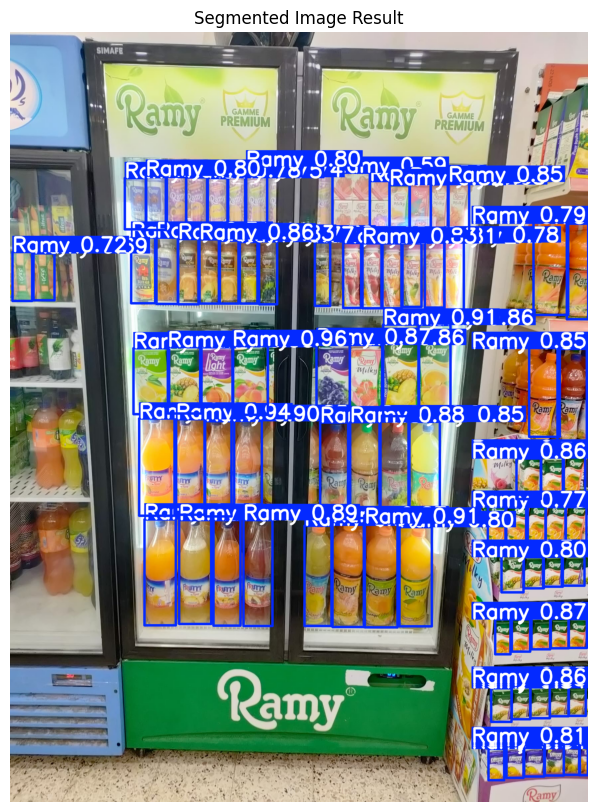

Class count for image WhatsApp Image 2025-02-13 à 22.41.09_a6b1c2c1.jpg:
  Ramy: 85

--------------------------------------------------


image 1/1 /kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.48.11_611695b7.jpg: 640x480 57 Ramys, 4 nonRamys, 6.3ms
Speed: 2.3ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train29


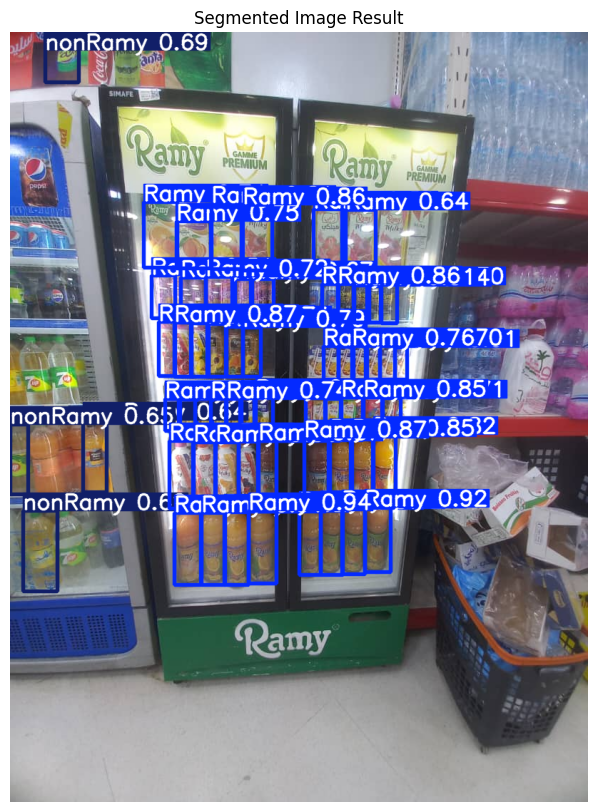

Class count for image WhatsApp Image 2025-02-13 à 22.48.11_611695b7.jpg:
  Ramy: 57
  nonRamy: 4

--------------------------------------------------


image 1/1 /kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.48.27_73cb7bbe.jpg: 640x480 70 Ramys, 6.7ms
Speed: 2.3ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train30


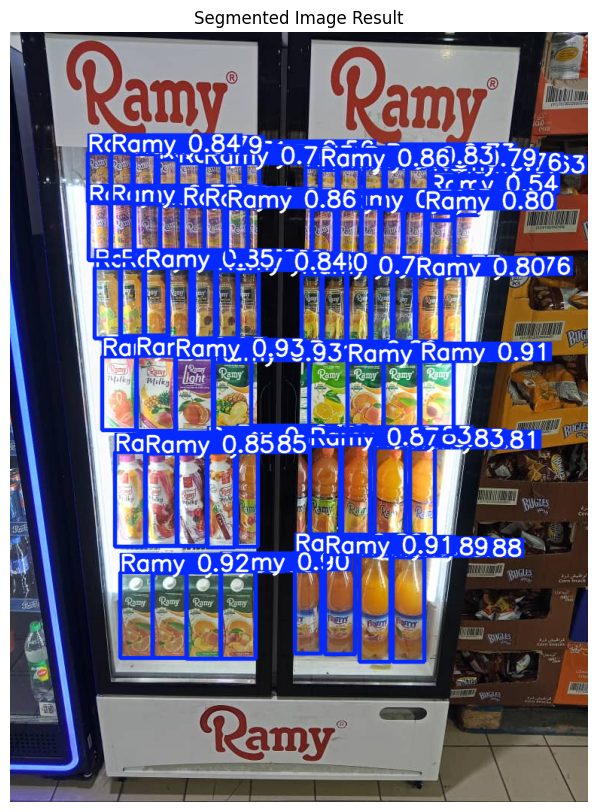

Class count for image WhatsApp Image 2025-02-13 à 22.48.27_73cb7bbe.jpg:
  Ramy: 70

--------------------------------------------------


image 1/1 /kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.48.25_8148d2fb.jpg: 640x480 58 Ramys, 6.4ms
Speed: 2.3ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train31


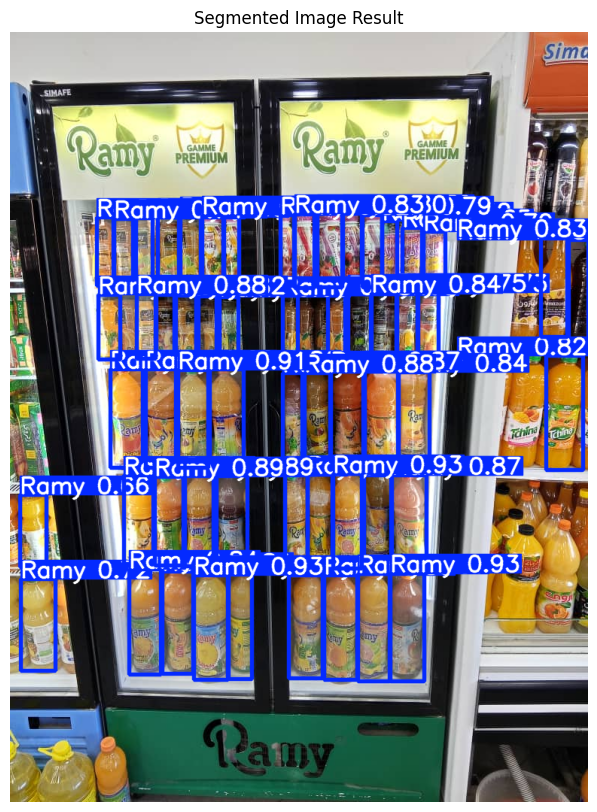

Class count for image WhatsApp Image 2025-02-13 à 22.48.25_8148d2fb.jpg:
  Ramy: 58

--------------------------------------------------


image 1/1 /kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.48.22_a6162e1a.jpg: 640x384 24 Ramys, 7.0ms
Speed: 1.7ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/train32


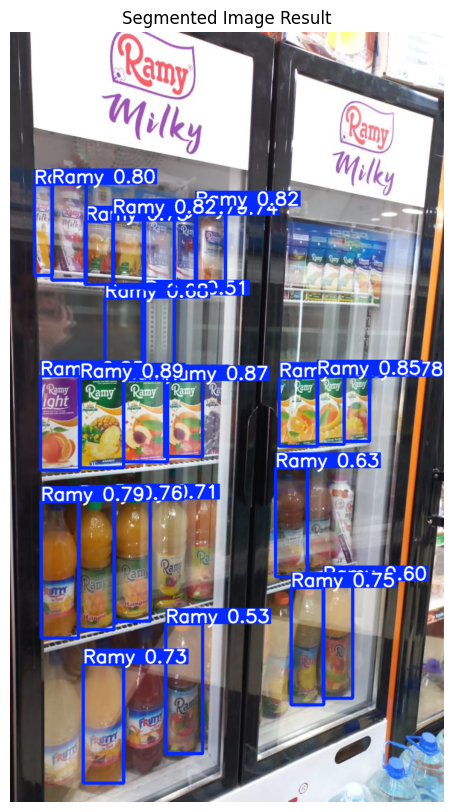

Class count for image WhatsApp Image 2025-02-13 à 22.48.22_a6162e1a.jpg:
  Ramy: 24

--------------------------------------------------



In [7]:
from ultralytics import YOLO
from collections import Counter
import cv2
import matplotlib.pyplot as plt


# List of 6 images for evaluation
image_paths = [
    "/kaggle/input/testfinal/WhatsApp Image 2025-02-09  16.17.28_11134739.jpg",
    "/kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.40.39_65a47ad5.jpg",
    "/kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.40.31_216e6ae0.jpg",
    "/kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.40.31_4e528d5e.jpg",
    "/kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.41.09_a6b1c2c1.jpg",
    "/kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.48.11_611695b7.jpg",
    "/kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.48.27_73cb7bbe.jpg",
    "/kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.48.25_8148d2fb.jpg",
    "/kaggle/input/finall/Photos supplémentaires rayonnage/WhatsApp Image 2025-02-13 à 22.48.22_a6162e1a.jpg"
    
]

# Get class names from the model
class_names = model.names

# Run predictions on each image
for img_path in image_paths:
    results = model.predict(source=img_path, save=True, conf=0.5)
    
    # Initialize a counter for each image
    image_counter = Counter()

    for result in results:
        # Count the classes detected in the current image
        for c in result.boxes.cls:
            image_counter[int(c)] += 1

        # Display the segmented image using OpenCV and Matplotlib
        segmented_image = result.plot()  # Plot the results (with segmentation)
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title("Segmented Image Result")
        plt.axis("off")
        plt.show()

    # Display the count of each class for the current image
    print(f"Class count for image {img_path.split('/')[-1]}:")
    for cls_id, count in image_counter.items():
        print(f"  {class_names[cls_id]}: {count}")
    print("\n" + "-"*50 + "\n")
